In [1]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import  KNNImputer




ImportError: cannot import name 'KNNImputer'

In [3]:
import sklearn 
sklearn.__version__

'0.21.3'

# Data Analysis of the toxic comment dataset and EDA practice

In [4]:
full_data = pd.read_csv('./data/train_toxic.csv')

In [28]:
data = full_data[:100000]

Shape of the data: (100000, 45)

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')
count    19625.000000
mean         0.106794
std          0.263836
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name

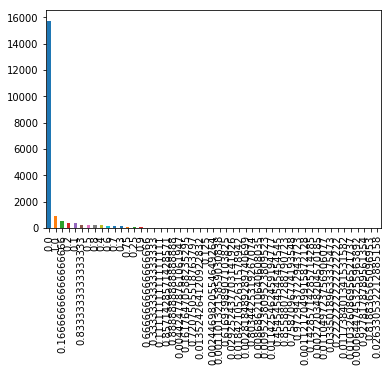

In [57]:
print(f"Shape of the data: {data.shape}\n")
print(data.columns)

# id, created_date

# features:
    # gender[ 'female', 'male' ]
    # religion = ['muslim, buddhist', 'christian', hindu', 'jewish', 'latino, other_religion, atheist]
    # sexuality = [bisexual, heterosexual, sexual_explicit, transgender, other_sexual_orientation, homosexual_gay_or_lesbian]
    # ethnicity = [black, white, other_race_or_ethnicity, asian]
    # disability = [intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness]
    # text: 'comment_text', 

# Label: 'target','severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat'

# additional_sentiment = ['rating', 'funny', 'wow', 'sad', 'likes', 'disagree' ]


# print(data.male.count())
# print(data.female.count())
# print(data.female.isna().sum())
# print(data.male.isna().sum())
# print(data.other_gender.isna().sum())




print(data.male.describe())
print(data.male.isna().sum())

print(data.info())


data.male.value_counts().plot(kind='bar')


# making ethnicity a single column (horizantal to vertical) 




## id, created_date

## features:
    # gender[ 'female', 'male' ]
    # religion = ['muslim, buddhist', 'christian', hindu', 'jewish', 'latino, other_religion, atheist]
    # sexuality = [bisexual, heterosexual, sexual_explicit, transgender, other_sexual_orientation, homosexual_gay_or_lesbian]
    # ethnicity = [black, white, other_race_or_ethnicity, asian]
    # disability = [intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness]
    # text: 'comment_text', 

## Label: 'target','severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat'

## additional_sentiment = ['rating', 'funny', 'wow', 'sad', 'likes', 'disagree' ]



In [38]:
ethnicity = ['black', 'white', 'other_race_or_ethnicity', 'asian']
gender[ 'female', 'male' ]
religion = ['muslim, buddhist', 'christian', hindu', 'jewish', 'latino, other_religion, atheist]
sexuality = [bisexual, heterosexual, sexual_explicit, transgender, other_sexual_orientation, homosexual_gay_or_lesbian]
ethnicity = [black, white, other_race_or_ethnicity, asian]
disability = [intellectual_or_learning_disability, other_disability, physical_disability, psychiatric_or_mental_illness]
for eth in ethnicity:
    print(eth, data[eth][data[eth]  > 0.5 ].count())

data.black[(data.black  > 0.5)  &  (data.white  > 0.5)].count()
# data.querry('data.black  > 0.5 & data.white  > 0.5').count()

black 538
white 873
other_race_or_ethnicity 9
asian 72


175

# Fill Nan Values with three different approaches

## Mean/Median imputation

In [62]:
mean_imputation_data = data.copy()

mean_imputation_data.black.fillna(mean_imputation_data['black'].mean(), inplace=True)

print(mean_imputation_data.black.isna().sum())


0


## Regression imputation

In [ ]:
lr_data = data.copy()

# replace all other Nans with mean()

lr_data.drop(columns='black').fillna(lr_data.mean())





# train_X = lr_data[lr_data.black.notnull()].drop(columns=['black', 'comment_text', 'created_date', 'rating'])
# train_Y = lr_data[lr_data.black.notnull()]['black']

# test_X = lr_data[lr_data.black.isnull()].drop(columns=['black', 'comment_text', 'created_date', 'rating'])
# test_Y = lr_data[lr_data.black.isnull()]['black']

# lr =  LinearRegression()

# lr.fit(train_X, train_Y)
# predicted = lr.predict(test_X)

# lr_data[lr_data.black.isnull()]['black'] = predicted

In [ ]:
knn_data = data.copy()

>>> nan = np.nan
>>> X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
>>> imputer = KNNImputer(n_neighbors=2, weights="uniform")
>>> imputer.fit_transform(X)